### ML Intro

![](overfitting.png)

In [31]:
import pandas as pd
import seaborn as sns

In [19]:
train = pd.read_csv(
    '/home/ahrzb/.kaggle/competitions/titanic/train.csv', 
    index_col='PassengerId'
)
test = pd.read_csv(
    '/home/ahrzb/.kaggle/competitions/titanic/test.csv', 
    index_col='PassengerId'
)

In [78]:
df = train.select_dtypes(exclude=['O']).dropna()
train_x = df.drop('Survived', axis='columns')
train_y = df.Survived

In [79]:
from sklearn import tree

In [89]:
from dtreeviz.trees import *

In [107]:
from sklearn.metrics import accuracy_score

In [129]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [144]:
df = train.sample(frac=1).select_dtypes(exclude=['O']).dropna()

In [151]:
val_x = df.head(100).drop('Survived', axis=1)
val_y = df.head(100).Survived

train_x = df.tail(len(df) - 100).drop('Survived', axis=1)
train_y = df.tail(len(df) - 100).Survived

In [152]:
def acc(n):
    clf = tree.DecisionTreeClassifier(max_depth=n)
    clf.fit(train_x, train_y)
    train_acc = accuracy_score(clf.predict(train_x), train_y)
    val_acc = accuracy_score(clf.predict(val_x), val_y)
    return train_acc, val_acc

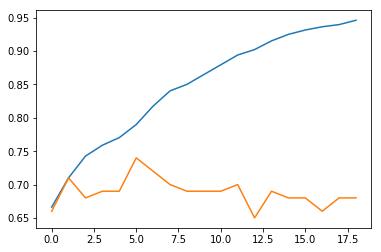

In [154]:
plt.plot([acc(i)[0] for i in range(1, 20)])
plt.plot([acc(i)[1] for i in range(1, 20)])

In [116]:
viz = dtreeviz(
    clf, 
    train_x, 
    train_y,
    target_name='Survives?',
    feature_names=train_x.columns,
    class_names=['No', 'Yes']
)
viz.view()

In [192]:
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [166]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(train_x, train_y)
accuracy_score(clf.predict(train_x), train_y)

0.7703583061889251

In [ ]:
iris.feature_names

In [215]:
iris = datasets.load_iris()
train_x = pd.DataFrame(iris.data, columns=iris.feature_names)
train_y = pd.Series(iris.target)

train_x, test_x, train_y, test_y = train_test_split(
    train_x, 
    train_y, 
    train_size=100, 
    test_size=50,
    random_state=42
)

In [243]:
train = pd.read_csv(
    '/home/ahrzb/.kaggle/competitions/titanic/train.csv', 
    index_col='PassengerId'
)
train = train.fillna(train.mean()).fillna('Other')

In [245]:
train_x = train.drop('Survived', axis='columns')
train_y = train.Survived

train_x, test_x, train_y, test_y = train_test_split(
    train_x, 
    train_y, 
    train_size=0.8, 
    random_state=42
)

train_x, val_x, train_y, val_y = train_test_split(
    train_x, 
    train_y, 
    train_size=0.9,
    random_state=42
)

/home/ahrzb/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [261]:
pd.get_dummies(train_x, columns=['Sex']).T.tail(2)

PassengerId,387,869,724,663,766,378,44,150,652,340,...,144,329,296,543,215,80,165,118,9,132
Sex_female,0,0,0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
Sex_male,1,1,1,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,1,0,1


In [260]:
train_x.Sex.astype('category').cat.codes.head()

PassengerId
387    1
869    1
724    1
663    1
766    0
dtype: int8

In [319]:
clf = tree.DecisionTreeClassifier(max_depth=50)
clf.fit(train_x.select_dtypes(include='number'), train_y)

accuracy_score(clf.predict(val_x.select_dtypes(include='number')), val_y)

0.6805555555555556

In [327]:
sorted(list(zip(train_x.select_dtypes(include='number').columns, clf.feature_importances_)), key=lambda x: x[1])

[('Parch', 0.03255677015204055),
 ('SibSp', 0.07411446282073433),
 ('Pclass', 0.11307724162021361),
 ('Fare', 0.3817974274218647),
 ('Age', 0.398454097985147)]